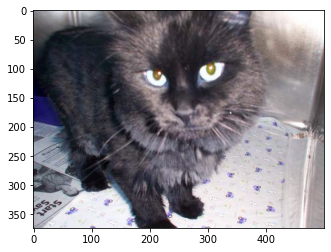

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
import cv2



dr =r"C:\Users\jayag\Desktop\program\SmartKnower\dataset\training_set"
categories = ["cats","dogs"]

for category in categories :
    path = os.path.join(dr , category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break    

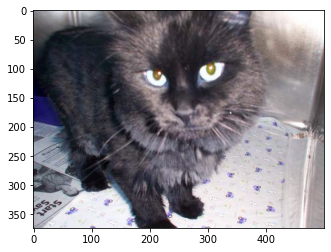

In [2]:
size  = 50
new_array = cv2.resize(img_array , (size , size))
plt.imshow(img_array )

In [3]:
training_data = []
def create_training_data():
    for category in categories :
        path = os.path.join(dr , category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array , (size,size))
                training_data.append([new_array,class_num])
            except :
                pass
        
create_training_data()       
        
        

In [4]:
#print(len(training_data))

In [5]:
x = []
y = []

In [6]:
for features,label in training_data :
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1 ,size,size,3)

    

In [7]:
import pickle 

pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()


pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [8]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D , MaxPool2D
import pickle

x = pickle.load(open("x.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

x = x/255

model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters = 64,kernel_size=(4,4),input_shape = x.shape[1:],activation = 'relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,kernel_size=(4,4),input_shape = (28,28,1),activation = 'relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
# Flatten
model.add(Flatten())

# 128 Neurons in 1st Dense Layer
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
#Output Layer
model.add(Dense(64,activation='softmax'))

C:\Users\jayag\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jayag\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jayag\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jayag\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [17]:
model.fit(x,y,epochs = 15,validation_split = 0.1)

Train on 7187 samples, validate on 799 samples
Epoch 1/15
7187/7187 [==============================] - 17s 2ms/sample - loss: 0.1213 - acc: 0.9546 - val_loss: 1.3665 - val_acc: 0.6283
Epoch 2/15
7187/7187 [==============================] - 20s 3ms/sample - loss: 0.0697 - acc: 0.9754 - val_loss: 1.5271 - val_acc: 0.6633
Epoch 3/15
7187/7187 [==============================] - 19s 3ms/sample - loss: 0.0745 - acc: 0.9730 - val_loss: 1.3625 - val_acc: 0.7034
Epoch 4/15
7187/7187 [==============================] - 22s 3ms/sample - loss: 0.0536 - acc: 0.9812 - val_loss: 1.4535 - val_acc: 0.6846
Epoch 5/15
7187/7187 [==============================] - 20s 3ms/sample - loss: 0.0480 - acc: 0.9834 - val_loss: 1.4233 - val_acc: 0.6971
Epoch 6/15
7187/7187 [==============================] - 20s 3ms/sample - loss: 0.0276 - acc: 0.9915 - val_loss: 2.0615 - val_acc: 0.6483
Epoch 7/15
7187/7187 [==============================] - 19s 3ms/sample - loss: 0.0342 - acc: 0.9889 - val_loss: 2.6716 - val_acc: 0

In [16]:
#model.summary()

In [20]:
model.save('Model_Image_Recogniser.h5')